### Domain Analysis

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


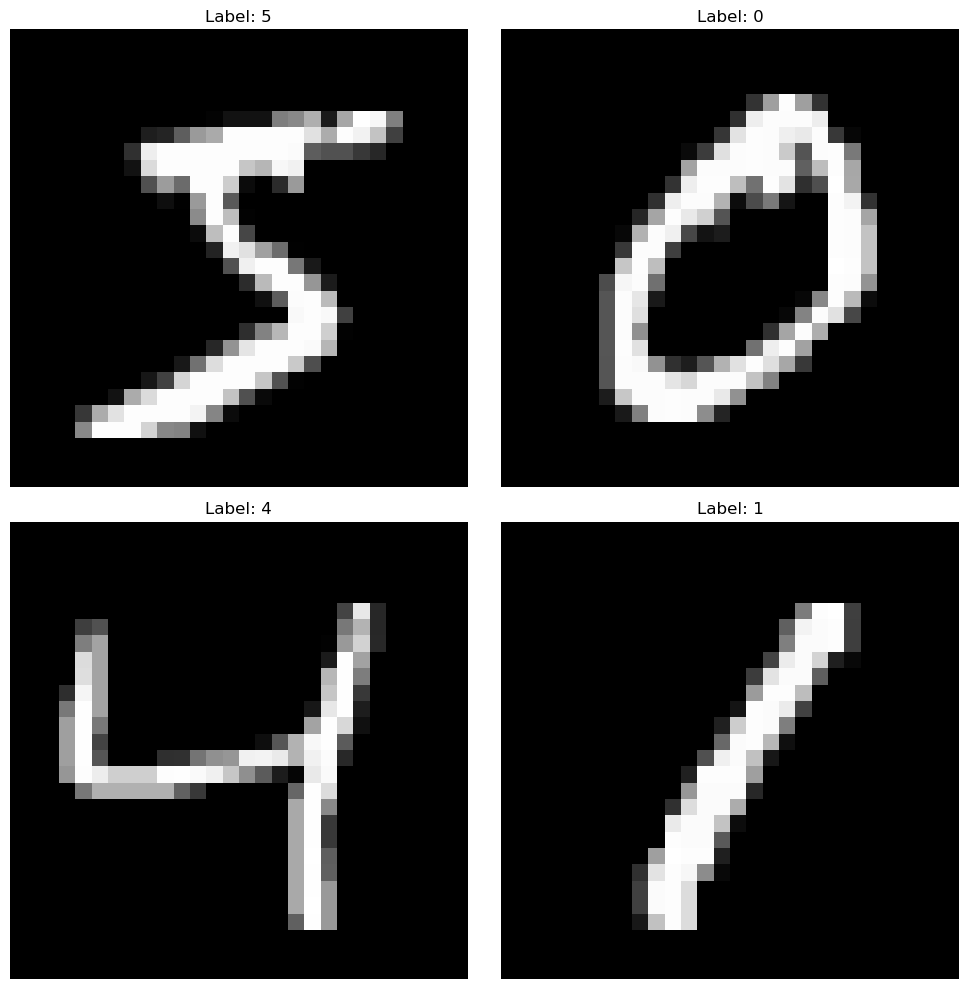

In [3]:
import matplotlib.pyplot as plt

# Display 4 sample images from the training set
plt.figure(figsize=(10, 10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')  # Turn off the axes

plt.tight_layout()
plt.show()


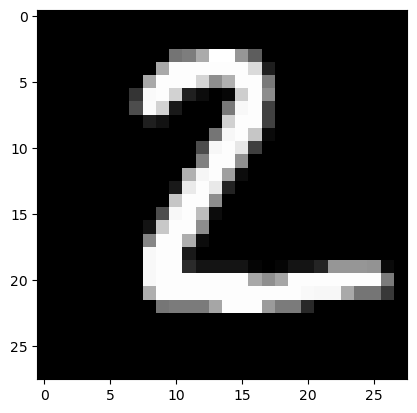

In [4]:
plt.imshow(x_test[1], cmap='gray')

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### Scaling 

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Model Creation

### CNN

In [9]:
model = Sequential()

In [10]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

C:\Users\G phanindra\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer = 'Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 1.0000 - loss: 5.8671e-05 - val_accuracy: 0.9788 - val_loss: 0.1317
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9718 - val_loss: 0.1686
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9988 - loss: 0.0038 - val_accuracy: 0.9772 - val_loss: 0.1397
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 1.0000 - loss: 3.2445e-04 - val_accuracy: 0.9779 - val_loss: 0.1395
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 1.0000 - loss: 1.3833e-04 - val_accuracy: 0.9784 - val_loss: 0.1373
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 1.0000 - loss: 8.1195e-05 - val_accuracy: 0.9784 - val_loss: 0.1373
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 1.0000 - loss: 6.6781e-05 - val_accuracy: 0.9783 - val_loss: 0.1379
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 1.0000 - loss: 5.64

In [18]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9769 - loss: 0.1948


[0.15807943046092987, 0.9797999858856201]

### CNN Optimized model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical


# Reshape the data to fit the model (adding a single channel as it's grayscale)
x_train1 = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test1 = x_test.reshape(x_test.shape[0], 28, 28, 1)


# Convert labels to one-hot encoded format
y_train1 = to_categorical(y_train, 10)
y_test1 = to_categorical(y_test, 10)

# Create the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())  # Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer with 10 classes (for digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train1, y_train1, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test1, y_test1)
print(f'Test Accuracy: {test_accuracy}')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 68ms/step - accuracy: 0.8579 - loss: 0.4548 - val_accuracy: 0.9770 - val_loss: 0.0778
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9757 - loss: 0.0816 - val_accuracy: 0.9807 - val_loss: 0.0594
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 67ms/step - accuracy: 0.9838 - loss: 0.0573 - val_accuracy: 0.9860 - val_loss: 0.0470
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9867 - loss: 0.0439 - val_accuracy: 0.9833 - val_loss: 0.0561
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9903 - loss: 0.0362 - val_accuracy: 0.9863 - val_loss: 0.0517
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9901 - loss: 0.0335 - val_accuracy: 0.9868 - val_loss: 0.0476
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9923 - loss: 0.0251 - val_accuracy: 0.9862 - val_loss: 0.0517
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9921 - loss: 0.0247 - 

### Preprocessing for classification models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Flatten the images into 1D arrays
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Split the data into training and validation sets
x_train_resampled, x_val_resampled, y_train_resampled, y_val_resampled = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=42)


# SVM

### SVM with validation

In [20]:
# Create and train the SVM model
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(x_train_resampled, y_train_resampled)

# Validate on the validation set
y_pred_val_svm = svm_model.predict(x_val_resampled)
print(f'SVM Validation Accuracy: {accuracy_score(y_val_resampled, y_pred_val_svm)}')

# Test on the test set
y_pred_test_svm = svm_model.predict(x_test_flat)
print(f'SVM Test Accuracy: {accuracy_score(y_test, y_pred_test_svm)}')


SVM Validation Accuracy: 0.9775833333333334
SVM Test Accuracy: 0.9777


In [21]:
# Calculate Training Accuracy
y_pred_train_svm = svm_model.predict(x_train_resampled)
training_accuracy = accuracy_score(y_train_resampled, y_pred_train_svm)
print(f'SVM Training Accuracy: {training_accuracy}')

SVM Training Accuracy: 0.9895833333333334


### SVM without validation 

In [22]:
svm_model1 = svm.SVC(kernel='rbf')
svm_model1.fit(x_train_flat, y_train)

# Test on the test set
y_pred_test_svm1 = svm_model1.predict(x_test_flat)
print(f'SVM Test Accuracy: {accuracy_score(y_test, y_pred_test_svm1)}')


SVM Test Accuracy: 0.9792


In [23]:
# Calculate Training Accuracy
y_pred_train_svm1 = svm_model1.predict(x_train_flat)
training_accuracy = accuracy_score(y_train, y_pred_train_svm1)
print(f'SVM Training Accuracy: {training_accuracy}')


SVM Training Accuracy: 0.9899166666666667


# KNN

### KNN with validation

In [24]:
# Create and train the SVM model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_resampled, y_train_resampled)

# Validate on the validation set
y_pred_val_knn = knn_model.predict(x_val_resampled)
print(f'KNN Validation Accuracy: {accuracy_score(y_val_resampled, y_pred_val_knn)}')

# Test on the test set
y_pred_test_knn = knn_model.predict(x_test_flat)
print(f'KNN Test Accuracy: {accuracy_score(y_test, y_pred_test_knn)}')


KNN Validation Accuracy: 0.9715
KNN Test Accuracy: 0.967


In [25]:
# Calculate Training Accuracy
y_pred_train_knn = knn_model.predict(x_train_resampled)
training_accuracy_knn = accuracy_score(y_train_resampled, y_pred_train_knn)
print(f'KNN Training Accuracy: {training_accuracy_knn}')

KNN Training Accuracy: 0.9797083333333333


### KNN without validation

In [26]:
knn_model1 = KNeighborsClassifier(n_neighbors=5)
knn_model1.fit(x_train_flat, y_train)

# Test on the test set
y_pred_test_knn1 = knn_model1.predict(x_test_flat)
print(f'KNN Test Accuracy: {accuracy_score(y_test, y_pred_test_knn1)}')

# Calculate Training Accuracy
y_pred_train_knn1 = knn_model1.predict(x_train_resampled)
training_accuracy_knn1 = accuracy_score(y_train_resampled, y_pred_train_knn1)
print(f'KNN Training Accuracy: {training_accuracy_knn1}')

KNN Test Accuracy: 0.9688
KNN Training Accuracy: 0.9817083333333333


# Gradient Boosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create and train the optimized Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=75, max_depth=3, warm_start=True)
gb_model.fit(x_train_resampled, y_train_resampled)

# Calculate Training Accuracy
y_pred_train_gb = gb_model.predict(x_train_resampled)
training_accuracy_gb = accuracy_score(y_train_resampled, y_pred_train_gb)
print(f'Gradient Boosting Training Accuracy: {training_accuracy_gb}')

# Validate on the validation set
y_pred_val_gb = gb_model.predict(x_val_resampled)
validation_accuracy_gb = accuracy_score(y_val_resampled, y_pred_val_gb)
print(f'Gradient Boosting Validation Accuracy: {validation_accuracy_gb}')

# Test on the test set
y_pred_test_gb = gb_model.predict(x_test_flat)
test_accuracy_gb = accuracy_score(y_test, y_pred_test_gb)
print(f'Gradient Boosting Test Accuracy: {test_accuracy_gb}')


Gradient Boosting Training Accuracy: 0.9534166666666667
Gradient Boosting Validation Accuracy: 0.94075
Gradient Boosting Test Accuracy: 0.939


## Random Foest

### Random Forest with validation

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train_resampled, y_train_resampled)

# Calculate Training Accuracy
y_pred_train_rf = rf_model.predict(x_train_resampled)
training_accuracy_rf = accuracy_score(y_train_resampled, y_pred_train_rf)
print(f'Random Forest Training Accuracy: {training_accuracy_rf}')

# Validate on the validation set
y_pred_val_rf = rf_model.predict(x_val_resampled)
validation_accuracy_rf = accuracy_score(y_val_resampled, y_pred_val_rf)
print(f'Random Forest Validation Accuracy: {validation_accuracy_rf}')

# Test on the test set
y_pred_test_rf = rf_model.predict(x_test_flat)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print(f'Random Forest Test Accuracy: {test_accuracy_rf}')


Random Forest Training Accuracy: 1.0
Random Forest Validation Accuracy: 0.9684166666666667
Random Forest Test Accuracy: 0.9677


### Random Forest without validation

In [29]:
# Create and train the Random Forest model
rf_model1 = RandomForestClassifier()
rf_model1.fit(x_train_flat, y_train)

# Calculate Training Accuracy
y_pred_train_rf1 = rf_model1.predict(x_train_flat)
training_accuracy_rf1 = accuracy_score(y_train, y_pred_train_rf1)
print(f'Random Forest Training Accuracy: {training_accuracy_rf1}')

# Test on the test set
y_pred_test_rf1 = rf_model1.predict(x_test_flat)
test_accuracy_rf1 = accuracy_score(y_test, y_pred_test_rf1)
print(f'Random Forest Test Accuracy: {test_accuracy_rf1}')


Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9704


## Decision Tree

### Decision Tree with validation

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_resampled, y_train_resampled)

# Calculate Training Accuracy
y_pred_train_dt = dt_model.predict(x_train_resampled)
training_accuracy_dt = accuracy_score(y_train_resampled, y_pred_train_dt)
print(f'Decision Tree Training Accuracy: {training_accuracy_dt}')

# Validate on the validation set
y_pred_val_dt = dt_model.predict(x_val_resampled)
validation_accuracy_dt = accuracy_score(y_val_resampled, y_pred_val_dt)
print(f'Decision Tree Validation Accuracy: {validation_accuracy_dt}')

# Test on the test set
y_pred_test_dt = dt_model.predict(x_test_flat)
test_accuracy_dt = accuracy_score(y_test, y_pred_test_dt)
print(f'Decision Tree Test Accuracy: {test_accuracy_dt}')


Decision Tree Training Accuracy: 1.0
Decision Tree Validation Accuracy: 0.8690833333333333
Decision Tree Test Accuracy: 0.8744


### Decision Tree without validation

In [31]:
# Create and train the Decision Tree model
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x_train_flat, y_train)

# Calculate Training Accuracy
y_pred_train_dt1 = dt_model1.predict(x_train_flat)
training_accuracy_dt1 = accuracy_score(y_train, y_pred_train_dt1)
print(f'Decision Tree Training Accuracy: {training_accuracy_dt1}')

# Test on the test set
y_pred_test_dt1 = dt_model1.predict(x_test_flat)
test_accuracy_dt1 = accuracy_score(y_test, y_pred_test_dt1)
print(f'Decision Tree Test Accuracy: {test_accuracy_dt1}')


Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.8773


# Methodology

# Observation

# Conclusion

# Project Analysis